#### Voigt profile
2025/06/13
- Convolution of zero-centered Lorentzian and Gaussian profiles
- Understanding how pressure / doppler broadening jointly modifies the distribution of cross sections


<>:34: SyntaxWarning: invalid escape sequence '\g'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\g'
<>:35: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_570494/3650820449.py:34: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(x_values, lorentz, label=f'Lorentzian PDF $\gamma={gamma}$)', linestyle='--')
/tmp/ipykernel_570494/3650820449.py:35: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_values, gaussian, label=f'Gaussian PDF $\sigma={sigma}$)', linestyle='--')


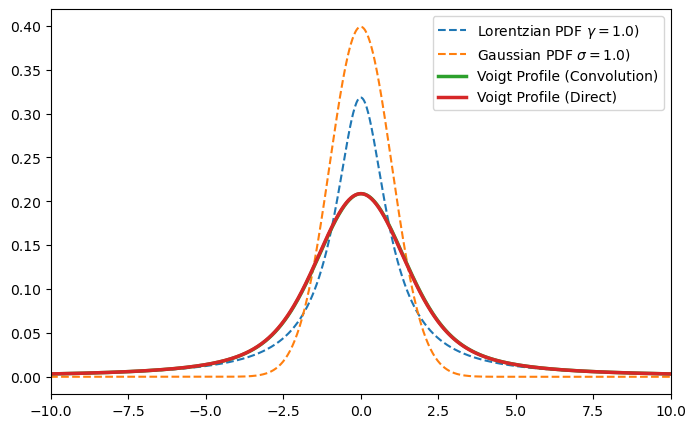

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm
from scipy.special import voigt_profile
from scipy.signal import convolve
# from scipy import integrate

# --- Define parameters for the Lorentzian distribution ---
x0 = 0.0   # Location parameter (peak position)
gamma = 1. # Scale parameter (half-width at half-maximum, HWHM)

# Create a range of x values
x_values = np.linspace(cauchy.ppf(0.005),
                cauchy.ppf(0.995), 5000)

# Calculate the PDF for each x value
lorentz = cauchy.pdf(x_values, loc=x0, scale=gamma)

# Define parameters for the Gaussian distribution
mu = 0    # Mean
sigma = 1. # Standard deviation (for a standard normal distribution)

# Calculate the PDF for each x value
gaussian = norm.pdf(x_values, loc=mu, scale=sigma)

# Convolve
dx = x_values[1] - x_values[0] # Step size for numerical integration
voigt = convolve(gaussian, lorentz, mode='same') * dx

# Get Voigt profile directly
voigt_profile_direct = voigt_profile(x_values, sigma, gamma)

plt.figure(figsize=(8, 5))
plt.plot(x_values, lorentz, label=f'Lorentzian PDF $\gamma={gamma}$)', linestyle='--')
plt.plot(x_values, gaussian, label=f'Gaussian PDF $\sigma={sigma}$)', linestyle='--')
plt.plot(x_values, voigt, label='Voigt Profile (Convolution)', linewidth=2.5)
plt.plot(x_values, voigt_profile_direct, label='Voigt Profile (Direct)', linewidth=2.5)
plt.xlim(-10, 10)
plt.legend()

#### Sole effect of temperature / pressure
increasing gamma ~ increasing pressure

increasing sigma ~ increasing temperature

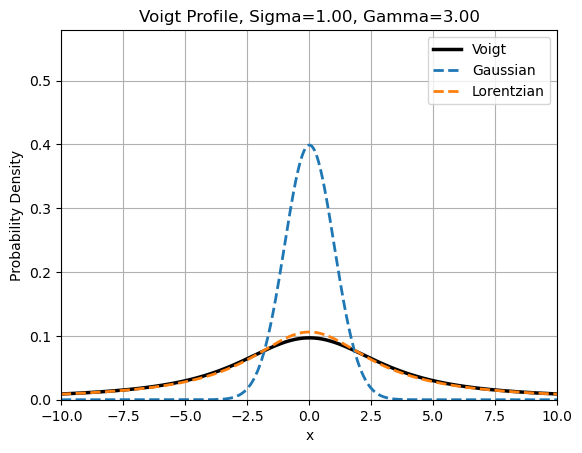

In [54]:
# make an animation, fixed sigma, increasing gamma
import matplotlib.animation as animation

# --- Parameters ---
sigma_g = 1.0  # Fixed Gaussian standard deviation
gamma_values = np.linspace(0.5, 3, 50)  # Increasing Lorentzian HWHM values (example)
x_values = np.linspace(cauchy.ppf(0.005),
                cauchy.ppf(0.995), 5000)

gaussian = norm.pdf(x_values, loc=mu, scale=sigma)

# --- Function to generate a frame of the animation ---
def create_frame(gamma):
    lorentz = cauchy.pdf(x_values, loc=x0, scale=gamma)
    voigt_profile_data = voigt_profile(x_values, sigma_g, gamma)
    return lorentz, voigt_profile_data, # Return as a tuple

# --- Create the animation ---
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2.5, color="k", label="Voigt")
line_gaussian,   = ax.plot([], [], lw=2, label='Gaussian', linestyle='--')
line_lorentzian, = ax.plot([], [], lw=2, label='Lorentzian', linestyle='--')
ax.set_xlim(-10, 10)
ax.set_ylim(0, np.max([voigt_profile(x_values, sigma_g, g) for g in gamma_values]) + .3) # Dynamic y-axis
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.grid(True)
ax.legend()

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    lorentz, voigt_profile_data, = create_frame(gamma_values[i]) # Unpack tuple
    line.set_data(x_values, voigt_profile_data)
    line_gaussian.set_data(x_values, gaussian)
    line_lorentzian.set_data(x_values, lorentz)
    ax.set_title(f'Voigt Profile, Sigma={sigma_g:.2f}, Gamma={gamma_values[i]:.2f}') # Update title
    return (line,)

ani = animation.FuncAnimation(fig, animate, frames=len(gamma_values), init_func=init, blit=True, repeat=False)

# To save the animation (optional):
ani.save("voigt_animation_gamma.gif", writer="pillow") # Or .mp4, etc.

# plt.show()

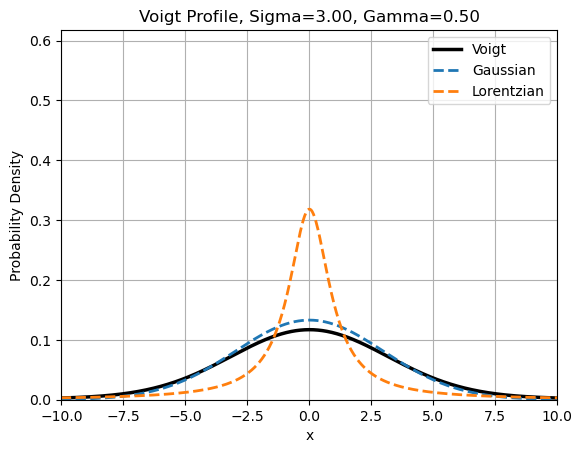

In [53]:
# --- Parameters ---
gamma_l = .5  # Fixed Gaussian standard deviation
sigma_values = np.linspace(0.5, 3, 50)  # Increasing Lorentzian HWHM values (example)
x_values = np.linspace(cauchy.ppf(0.005),
                cauchy.ppf(0.995), 5000)

lorentz = cauchy.pdf(x_values, loc=x0, scale=gamma)

# --- Function to generate a frame of the animation ---
def create_frame(sigma):
    gaussian = norm.pdf(x_values, loc=mu, scale=sigma)
    voigt_profile_data = voigt_profile(x_values, sigma, gamma_l)
    return gaussian, voigt_profile_data, # Return as a tuple

# --- Create the animation ---
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2.5, color="k", label="Voigt")
line_gaussian,   = ax.plot([], [], lw=2, label='Gaussian', linestyle='--')
line_lorentzian, = ax.plot([], [], lw=2, label='Lorentzian', linestyle='--')
ax.set_xlim(-10, 10)
ax.set_ylim(0, np.max([voigt_profile(x_values, s, gamma_l) for s in sigma_values]) + .2) # Dynamic y-axis
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.grid(True)
ax.legend()

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    gaussian, voigt_profile_data, = create_frame(sigma_values[i]) # Unpack tuple
    line.set_data(x_values, voigt_profile_data)
    line_gaussian.set_data(x_values, gaussian)
    line_lorentzian.set_data(x_values, lorentz)
    ax.set_title(f'Voigt Profile, Sigma={sigma_values[i]:.2f}, Gamma={gamma_l:.2f}') # Update title
    return (line,)

ani = animation.FuncAnimation(fig, animate, frames=len(gamma_values), init_func=init, blit=True, repeat=False)

# To save the animation (optional):
ani.save("voigt_animation_sigma.gif", writer="pillow") # Or .mp4, etc.

# plt.show()

#### What if temperature and pressure change simultaneously such that the ratio of sigma and gamma remains relatively unchanged?

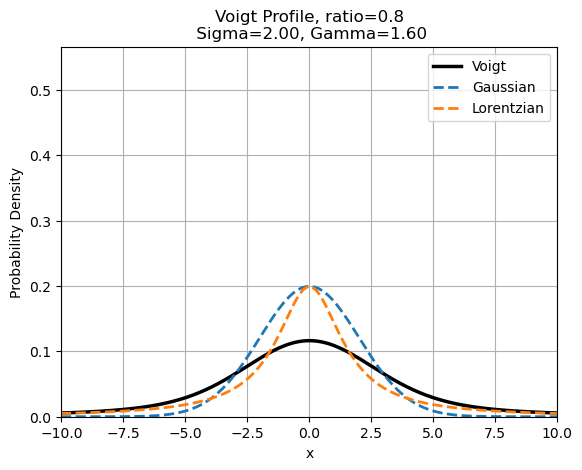

In [57]:
# make an animation, fixed the ratio

# --- Parameters ---
ratio   = .8
x_values = np.linspace(cauchy.ppf(0.005),
                cauchy.ppf(0.995), 5000)
sigma_values = np.linspace(0.5, 2, 40)
gamma_values = sigma_values * ratio

# --- Function to generate a frame of the animation ---
def create_frame(gamma, sigma):
    gaussian = norm.pdf(x_values, loc=mu, scale=sigma)
    lorentz = cauchy.pdf(x_values, loc=x0, scale=gamma)
    voigt_profile_data = voigt_profile(x_values, sigma, gamma)
    return gaussian, lorentz, voigt_profile_data, # Return as a tuple

# --- Create the animation ---
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2.5, color="k", label="Voigt")
line_gaussian,   = ax.plot([], [], lw=2, label='Gaussian', linestyle='--')
line_lorentzian, = ax.plot([], [], lw=2, label='Lorentzian', linestyle='--')
ax.set_xlim(-10, 10)
ax.set_ylim(0, np.max([voigt_profile(x_values, s, g) for s, g in zip(sigma_values, gamma_values)]) + .1) # Dynamic y-axis
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.grid(True)
ax.legend()

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    gaussian, lorentz, voigt_profile_data, = create_frame(gamma_values[i], sigma_values[i]) # Unpack tuple
    line.set_data(x_values, voigt_profile_data)
    line_gaussian.set_data(x_values, gaussian)
    line_lorentzian.set_data(x_values, lorentz)
    ax.set_title(f'Voigt Profile, ratio={ratio}\n Sigma={sigma_values[i]:.2f}, Gamma={gamma_values[i]:.2f}') # Update title
    return (line,)

ani = animation.FuncAnimation(fig, animate, frames=len(gamma_values), init_func=init, blit=True, repeat=False)

# To save the animation (optional):
ani.save(f"voigt_animation_unchanged_ratio={ratio}.gif", writer="pillow") # Or .mp4, etc.

# plt.show()

This can be potentially used to retrieve temeprature?